In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install --upgrade scipy

     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DSA/ Activity Data sets/Week 8/Week_8_Q&A_dataset - Sheet1.csv")

In [ ]:
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


## Q1: Descriptive analytics on the dataset

In [ ]:
data.describe(include= object)

,Gender,Test preparation
count,28,28
unique,2,2
top,female,none
freq,16,21


In [ ]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [ ]:
data.groupby('Gender').std()

,Total Marks
Gender,
female,12.865976
male,12.168950


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


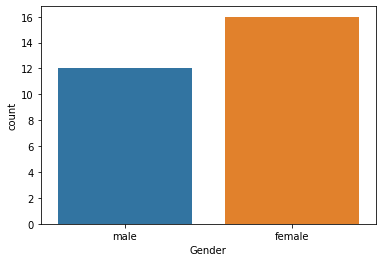

In [ ]:
sns.countplot(data['Gender'])

We can see that the there are 12 Male students and 16 female students in the class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


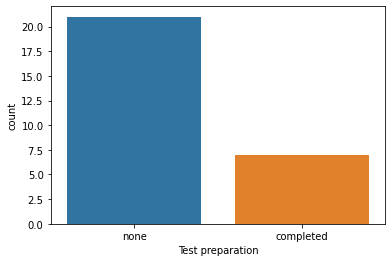

In [ ]:
sns.countplot(data['Test preparation'])

In [ ]:
data['Test preparation'].value_counts()

none         21
completed     7
Name: Test preparation, dtype: int64

We can see that only 7 students completed the test preparation and 21 of the students not completed or taken any test preparation.

## Q2: Check whether female and male students scored the same marks.
  
  Here we can do a indepedent t-test, for the following hypothesis
    
    
    H0: Average Score of Male students equal to Average Score of Female students
    H1: Average Score of Male students not equal to Average Score of Female students

In [ ]:
t_stat , p_value = stats.ttest_ind(data.loc[data['Gender']=='male']['Total Marks'],data.loc[data['Gender']=='female']['Total Marks'])

In [ ]:
print("t-statistic value : ",round(t_stat,5))
print("p value : ",round(p_value,5))

t-statistic value :  -0.69409
p value :  0.49378


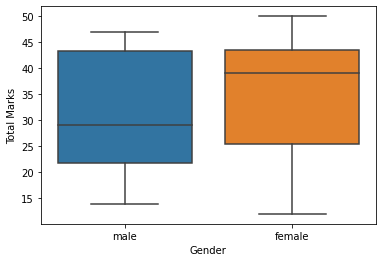

In [ ]:
sns.boxplot(x = 'Gender', y = 'Total Marks',data = data)

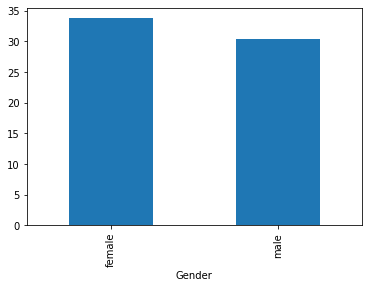

In [ ]:
data.groupby('Gender')['Total Marks'].mean().plot( kind = 'bar')

Since p value is greater than 0.05 so we forced to accept the null hypothesis and we can say that there is no significant difference between the average score between male and female.

## Q3: Whether  test preparation helps the students?
    Here we can use a one tailed t test to test the following hypothesis

      H0: The average score of students who completed the test preparation is less than or equal to the average score of students who do not completed or or taken any test preparation
      H1: The average score of students who completed the test preparation is greater than the average score of students who do not completed or or taken any test preparation

In [ ]:
t,p = stats.ttest_ind(data.loc[data['Test preparation']=='completed']['Total Marks'],data.loc[data['Test preparation']=='none']['Total Marks'], alternative='greater')

In [ ]:
print("t-statistic value : ",round(t,5))
print("p value : ",round(p,5))

t-statistic value :  3.61436
p value :  0.00063


For a signifiacane level of 0.05 the p value is less than 0.05 so we can reject the null hypothesis and we can say that the students completed their test preparation had scored more maks than those students who did not completed or taken any test preparation.

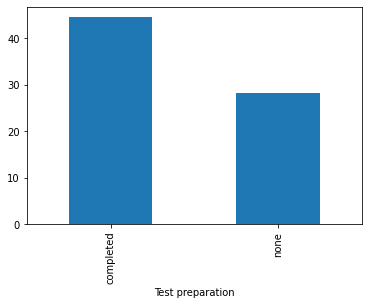

In [ ]:
data.groupby('Test preparation')['Total Marks'].mean().plot( kind = 'bar')